<!-- @format -->

# Assignment 3


In [175]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<!-- @format -->

## Task 1: MLE computation


<!-- @format -->

### Probabilistic interpretation for linear regression


<!-- @format -->

As you know, we can think about linear regression from the optimization point of view (as the problem of minimizing the root mean squared error), but we can also consider it from the probabilistic point of view.
Let's consider the following equation:

\begin{equation*}
y_i=x_i \beta_0+\varepsilon_i
\end{equation*}

where $y_i$ is the dependent variable, $x_i$ is a $1 \times K$ vector of regressors, $\beta_0$ is the $K \times 1$ vector of regression coefficients to be estimated and $\varepsilon_i$ is an unobservable error term.

The sample is made up of $N$ IID observations $\left(y_i, x_i\right)$.
The regression equations can be also written as

\begin{equation*}
y=X \beta_0+\varepsilon
\end{equation*}

where the $N \times 1$ vector of observations of the dependent variable is denoted by $y$, the $N \times K$ matrix of regressors is denoted by $X$, and the $N \times 1$ vector of error terms is denoted by $\varepsilon$.

As everybody interested in probability theory knows, we always have to have some assumptions. In this case, we assume that the vector of errors $\varepsilon$ has a multivariate normal distribution conditional on $x$, with mean equal to 0 and covariance matrix equal to

\begin{equation*}
\sigma_0^2 I
\end{equation*}

where $I$ is the $N \times N$ identity matrix and

\begin{equation*}
\sigma_0^2=\operatorname{Var}\left[\varepsilon_i \mid X\right]
\end{equation*}

is the second parameter to be estimated.
Furthermore, it is assumed that the matrix of regressors $x$ has full-rank.

Those assumptions have interesting implications:

- the covariance matrix of $\varepsilon$ is diagonal implies that the entries of $\varepsilon$ are mutually independent (i.e., $\varepsilon_i$ is independent of $\varepsilon_j$ for $i \neq j$.)
- they all have a normal distribution with mean 0 and variance $\sigma_0^2$.

The fact that we transform normal random variables linearly makes the dependent variable $y_i$ conditionally normal, with mean $x_i \beta_0$ and variance $\sigma_0^2$. Therefore, its cdf is

\begin{equation*}
f_Y\left(y_i \mid X\right)=\left(2 \pi \sigma_0^2\right)^{-1 / 2} \exp \left(-\frac{1}{2} \frac{\left(y_i-x_i \beta_0\right)^2}{\sigma_0^2}\right)
\end{equation*}

Having this probability model we can use it to do estimation of regression parameters using Maximum Likelihood Estimation method.

The first-order conditions for a maximum are

\begin{equation*}
\begin{aligned}
& \nabla\_\beta l\left(\beta, \sigma^2 ; y, X\right)=0 \\
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0
\end{aligned}
\end{equation*}

where $\nabla_\beta$ indicates the gradient calculated with respect to $\beta$, that is, the vector of the partial derivatives of the log-likelihood with respect to the entries of $\beta$. The gradient is

\begin{equation*}
\begin{aligned}
& \nabla*\beta l\left(\beta, \sigma^2: y, X\right) \\
= & \nabla*\beta\left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum*{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & \frac{1}{\sigma^2} \sum*{i=1}^N x*i^{\top}\left(y_i-x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(\sum*{i=1}^N x*i^{\top} y_i-\sum*{i=1}^N x_i^{\top} x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(X^{\top} y-X^{\top} X \beta\right) \\
\end{aligned}
\end{equation*}

which is equal to zero only if

\begin{equation*}
\sum*{i=1}^N x_i^{\top} y_i-\sum*{i=1}^N x_i^{\top} x_i \beta=0
\end{equation*}

Therefore, the first of the two equations is satisfied if

\begin{equation*}
\beta=\left(\sum*{i=1}^N x_i^{\top} x_i\right)^{-1} \sum*{i=1}^N x_i^{\top} y_i=\left(X^{\top} X\right)^{-1} X^{\top} y
\end{equation*}

where we have used the assumption that $x$ has full rank and, as a consequence, $x^x x$ is invertible.


<!-- @format -->

### Subtask A:

Prove that the MLE for variance is equal to

$$
\widehat{\sigma}_n^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \widehat{\beta}_N\right)^2
$$

---


<!-- @format -->

$$
\frac{\partial}{\partial\sigma^2}l(\beta, \sigma^2; y; X)= \\
=\frac{\partial}{\partial\sigma^2}l \left(-\frac{N}{2} \ln(2\pi) - \frac{N}{2}\ln{\sigma^2} - \frac{1}{2 \sigma^2} \sum^N_{i=1} (y_i - x_i \beta)^2 \right) = \\
= \frac{1}{2 \sigma^4} \left(\sum^N_{i=1} (y_i - x_i \beta)^2 - N\sigma^2 \right)
$$

It equals zero if

$$
\sum^N_{i=1} (y_i - x_i \beta)^2 - N\sigma^2  = 0
$$

thus

$$
\hat\sigma^2 = \frac{1}{N} \sum^N_{i=1}(y_i - x_i \beta)^2
$$


<!-- @format -->

### MLE for Logistic regression

In the logistic regression model, the output variable $y_i$ is a Bernoulli random variable (it can take only two values, either 1 or 0 ) and

\begin{equation*}
\mathrm{P}\left(y_i=1 \mid x_i\right)=S\left(x_i \beta\right)
\end{equation*}

where

\begin{equation*}
S(t)=\frac{1}{1+\exp (-t)}
\end{equation*}

is the logistic function, $x_i$ is a $1 \times K$ vector of inputs and $\beta$ is a $K \times 1$ vector of coefficients.

Furthermore,

\begin{equation*}
\mathrm{P}\left(y_i=0 \mid x_i\right)=1-S\left(x_i \beta\right)
\end{equation*}

The vector of coefficients $\beta$ is the parameter to be estimated by maximum likelihood.
We assume that the estimation is carried out with an IID sample comprising $N$ data points

\begin{equation*}
\left(y_i, x_i\right) \text { for } i=1, \ldots, N
\end{equation*}

### Subtask B

1. Find the form of the loglikelihood.
2. Compute the gradient of logistic function with respect to $\beta$

You can either tex your solution and put it in this notebook or attach photos of your solution.


<!-- @format -->

#### 1. Find the form of the loglikelihood.

$$
P(y_i=1| x_i) = S(x_i\beta) \\
P(y_i=0| x_i) = 1 - S(x_i\beta)


$$

we can write this two funtions as a one

$$
p(y_i | x_i ; \beta) = (S(x_i\beta))^{y_i}(1-S(x_i\beta))^{1-y_i}
$$

Then we likeliyhood will looks like this

$$
L(\beta) = \prod_{i=1}^n p(\vec{y} \ | \ x ;\beta) = p(y_1 | x_1 ; \beta) \ \cdot \ p(y_2 | x_2 ; \beta) \ \cdot \ ... \ \cdot p(y_n | x_n; \beta) = \\
= (S(x_1\beta))^{y_1}(1-S(x_1\beta))^{1-y_1} \cdot ... \ \cdot (S(x_n\beta))^{y_n}(1-S(x_n\beta))^{1-y_n}
$$

and log likelyhood

$$
\ell(\beta) = \ln L(\beta) = \sum_{i=1}^n y_i \ln S(x_i\beta) + (1-y_i) \ln (1-S(x_i\beta))
$$

To maximize log likelihood we will find OPT $\beta$ using gradient ascent

---

#### 2. Compute the gradient of logistic function with respect to $\beta$

$$
\frac{\partial S(x\beta)}{\partial \beta}  = \frac{\partial}{\partial \beta}\frac{1}{1+\exp (-x\beta)} = \\ = - \frac{1}{(1+\exp (-x\beta))^2} \cdot \frac{\partial}{\partial \beta} \exp(-x\beta) = \\ =  \frac{x \exp(-x\beta)}{(1+\exp (-x\beta))^2} =x \frac{\exp(-x\beta)}{1 + \exp(-x\beta)} \cdot \frac{1}{1+\exp(-x\beta)} = \\
= x(Sx\beta) (1 - S(x\beta)) =:(*)
$$


<!-- @format -->

## Task 2: Implement Logistic Regression

Use derivations form previous task to perform logistic regression. Provide a custom implemntation of gradient descent for this taks.
**Bonus points** provide also implementation of other optimization algorithm of your choice, eg. Newton-Rhapson method.


<!-- @format -->

### How we will maximize the gradient?


<!-- @format -->

To optimize parameter $\beta^{(j)}$ we will use

$$
\beta^{(j)} = \beta^{(j)} - \alpha \cdot \frac{\partial \ell(\beta)}{\partial \beta^{(j)}}
$$

At first we will calculate $\frac{\partial \ell(\beta)}{\partial \beta^{(j)}}$, let's $(x,y)$ be a training example

$$
\frac{\partial \ell(\beta)}{\partial \beta^{(j)}}
=  \frac{\partial } {\partial \beta^{(j)}} \Big(y \ln S(x\beta) + (1-y) \ln (1-S(x \beta)) \Big) = \\
= \left[ \frac{y}{S(x\beta)}  - \frac{1-y}{1 - S(x\beta)}\right]  \cdot \frac{\partial S(x\beta)}{\partial \beta^{(j)}} \overset{(*)}{=} \\
= \left[ \frac{y}{S(x\beta)}  - \frac{1-y}{1 - S(x\beta)}\right] \cdot (Sx\beta) (y - S(x\beta))x^{(j)} = \\
= (y(1 - S(x\beta)) - (1-y)(Sx\beta)) x^{(j)}= \\
= (y - yS(x\beta) - S(x\beta) + yS(x\beta)) x^{(j)} = \\
= (y - S(x\beta)) x^{(j)}
$$

now we end up with:

$$ \beta^{(j)} = \beta^{(j)} + \alpha(y_i - S(x_i\beta)) x_i^{(j)} $$
$$ \beta = \beta + \alpha(y_i - S(x_i\beta)) x_i $$


<!-- @format -->

### Newton's method


<!-- @format -->

We aim to maximize the function $\ell(\beta)$.

To achieve this, we seek a solution to the equation $\ell'(\beta) = 0$.

Let $f(\beta) = \ell'(\beta)$. Our goal is to iteratively refine approximations until we satisfy $f(\beta) = 0$.

Each iteration proceeds as follows:

- Compute $f(\beta^{(i)})$, i.e., the derivative at the current point.
- Update $\beta$ using the rule $\beta^{(i+1)} = \beta^{(i)} - \Delta$.
- Use the relationship for estimating the slope:
  $$
  f'(\beta^{(i)}) = \frac{f(\beta^{(i)})}{\Delta},
  $$
  which gives:
  $$
  \Delta = \frac{f(\beta^{(i)})}{f'(\beta^{(i)})}.
  $$

Substituting this, we derive the updated rule for $\beta$:

$$
\beta^{(i+1)} = \beta^{(i)} - \frac{f(\beta^{(i)})}{f'(\beta^{(i)})}.
$$

Since $f(\beta) = \ell'(\beta)$, this can be rewritten as:

$$
\beta^{(i+1)} = \beta^{(i)} - \frac{\ell'(\beta^{(i)})}{\ell''(\beta^{(i)})}.
$$

When $\beta$ is a vector, the update rule takes the following form:

$$
\beta^{(j+1)} = \beta^{(j)} - H^{-1} \nabla_{\beta} \ell,
$$

where $H$ is the Hessian matrix:

$$
H_{ij} = \frac{\partial^2 \ell}{\partial \beta_i \partial \beta_j}.
$$

lets calcualte second derivative of the log-likelihood function:
$$ \frac{\partial^2 l(\beta)}{\partial \beta^{(j)} \partial \beta^{(k)}} = \frac{\partial}{\partial \beta^{(j)}} (y - S(x\beta))x^{(k)} $$

$$ = yx^{(k)} - \frac{\partial S(x\beta)}{\partial \beta^{(k)}} $$
$$ = yx^{(k)} - S(x\beta)(1-S(x\beta)) \frac{\partial x\beta}{\partial \beta^{(k)}} $$
$$ = yx^{(k)} - S(x\beta)(1-S(x\beta)) x^{(k)} $$
$$ = x^{(k)}(y - S(x\beta) (1-S(x\beta))) $$


<!-- @format -->

---

### Implementation of logisitic regression


In [177]:
class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, x_i: np.array, β: np.array):
        some = -np.dot(x_i, β)
        return 1.0 / (1.0 + np.exp(some))

    def log_likelihood(self, x: np.array, y: np.array, β: np.array):
        epsilon = 1e-15
        s_x = self.sigmoid(x, β)  # Liczy sigmoid dla wszystkich przykładów jednocześnie
        s_x = np.clip(s_x, epsilon, 1 - epsilon)  # Clip values to prevent issues

        return np.sum(y * np.log(s_x) + (1 - y) * np.log(1 - s_x))

    def fit_CGA(self, y_test, x_test, β: np.array):
        losses = []
        for epoch in range(self.epochs):
            x_i, y_i = x_test[epoch % x_test.shape[0]], y_test[epoch % y.shape[0]]

            y_pred = self.sigmoid(x_i, β)

            gradient = (y_i - y_pred) * x_i
            β += self.learning_rate * gradient

            loss = -1 * self.log_likelihood(x_test, y_test, β)
            losses.append(loss)
        return β, losses

    def fit_newton(self, x: np.array, y: np.array, beta: np.array):
        losses = []

        for epoch in range(self.epochs):
            # Compute the predictions for all samples
            y_pred = self.sigmoid(x, beta)

            # Compute the gradient (first derivative of log-likelihood)
            gradient = np.dot(x.T, (y - y_pred))

            # Compute the Hessian matrix (second derivative of log-likelihood)
            s_diag = y_pred * (1 - y_pred)  # Sigmoid derivative
            hessian = np.dot(x.T * s_diag, x)

            # Update beta using the Newton-Raphson method
            hessian_inv = np.linalg.inv(hessian)
            beta_update = np.dot(hessian_inv, gradient)
            beta += self.learning_rate * beta_update

            # Compute the negative log-likelihood (loss)
            loss = -1 * self.log_likelihood(x, y, beta)
            losses.append(loss)

        return beta, losses

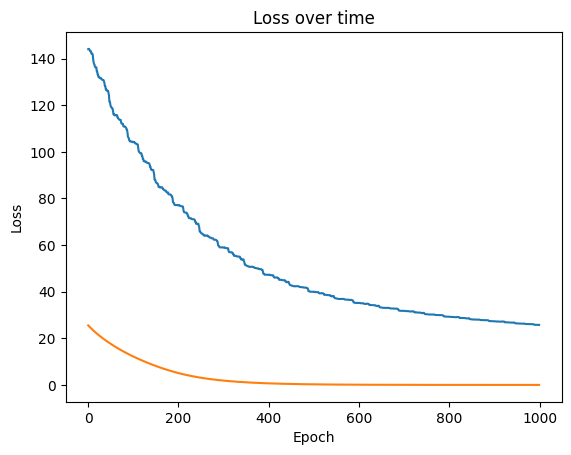

In [178]:
log_reg = LogisticRegression(0.01, 1000)


x, y = make_classification(
    n_samples=100, n_features=30, n_informative=2, n_redundant=0, n_clusters_per_class=1
)

β_sample = np.random.random(x.shape[1])


β, losses = log_reg.fit_CGA(y, x, β_sample)
β_1, losses_new = log_reg.fit_newton(x, y, β_sample)

plt.plot(losses)
plt.plot(losses_new)
plt.title("Loss over time")
plt.xlabel("Epoch")
plt.ylabel("Loss")


plt.show()

<!-- @format -->

## Task 3: Classification for Imbalanced Data


<!-- @format -->

Split the data using a technique suitable for imbalanced classes. Describe its working.

Train a logistic regression model on the below data.


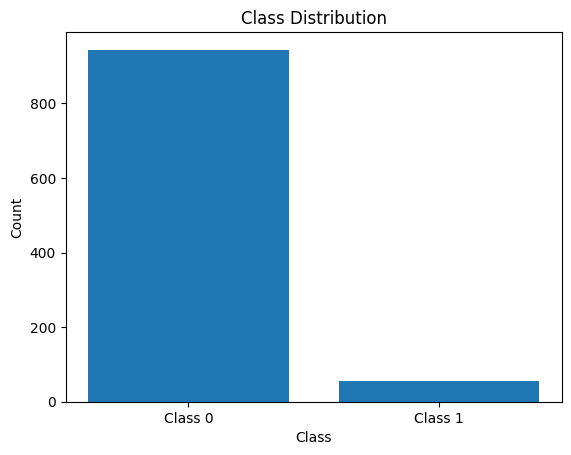

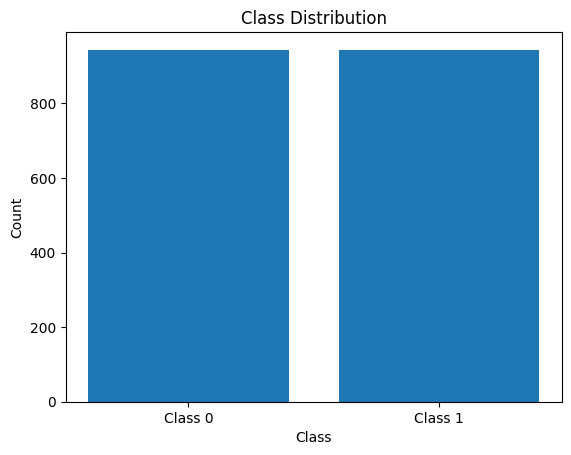

Dataset Shape: (1000, 20)
Class Distribution: [944  56]


array([ 2.61243195e-01,  3.30634574e-01,  2.95587102e-02,  2.48328438e-01,
        2.74044184e-01,  1.65235499e-02,  4.51438182e-02, -5.30629213e-04,
        2.10324280e-01,  5.22523444e-02,  1.47271398e-01,  3.56365045e-01,
        3.46007914e-01,  8.95258956e-01,  2.78654808e-01,  6.37009514e-01,
        1.00545016e+00,  2.09367098e-01,  8.82935711e-01,  2.55291030e-01])

In [179]:
# Create a synthetic dataset
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)

X, y = make_classification(
    n_samples=1000,
    n_informative=4,
    n_redundant=5,
    n_features=20,
    n_clusters_per_class=3,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42,
)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# visualize


# Split the resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = (
    train_test_split(X_resampled, y_resampled, test_size=0.8, random_state=42)
)


# training a logistic regression
β_sample = np.random.random(X.shape[1])
log_model = LogisticRegression(0.01, 1000)
β, losses = log_model.fit_CGA(y, X, β_sample)

# Visualize class distribution


def visualize_class_distribution(y):

    plt.bar(["Class 0", "Class 1"], [sum(y == 0), sum(y == 1)])

    plt.title("Class Distribution")

    plt.xlabel("Class")

    plt.ylabel("Count")

    plt.show()


visualize_class_distribution(y)
visualize_class_distribution(y_resampled)

# Summarize dataset

print("Dataset Shape:", X.shape)

print("Class Distribution:", np.bincount(y))
β

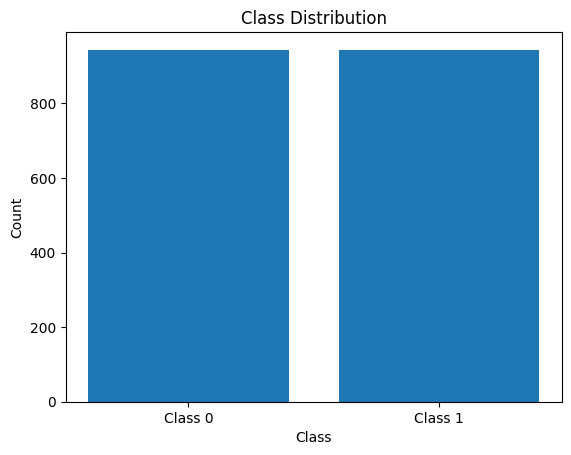

Confusion Matrix:
 [[533 240]
 [163 575]]
Accuracy: 0.7332892124420913
Precision: 0.7055214723926381
Recall: 0.7791327913279132
F1 Score: 0.7405022537025112
ROC AUC: 0.7343270683677082


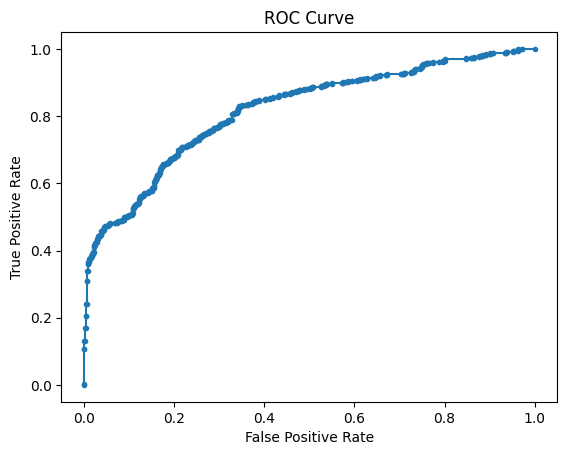

In [180]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# visualize
visualize_class_distribution(y_resampled)

# Split the resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = (
    train_test_split(X_resampled, y_resampled, test_size=0.8, random_state=42)
)

# Train a logistic regression model
log_reg = SklearnLogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_resampled = log_reg.predict(X_test_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test_resampled, y_pred_resampled)
accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
precision = precision_score(y_test_resampled, y_pred_resampled)
recall = recall_score(y_test_resampled, y_pred_resampled)
f1 = f1_score(y_test_resampled, y_pred_resampled)
roc_auc = roc_auc_score(y_test_resampled, y_pred_resampled)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_resampled, log_reg.predict_proba(X_test_resampled)[:, 1])
plt.plot(fpr, tpr, marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

<!-- @format -->

Evaluate your binary classifiers using the following:

- confusion matrix,
- accuracy,
- precision,
- recall,
- F1 score,
- ROCAUC.

Please write custom functions calculating the above functions and plotting the receiver operating characteristic curve. Describe your intuition behind each metric and its suitability for imbalanced classes.


<!-- @format -->

Propose, describe and implement a technique for improving the model's ability to distinguish the classes. Evaluate your approach.


In [181]:
class LogisticRegression:
    def __init__(self, learning_rate, epochs, regularization=None, lambda_=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = []
        self.regularization = regularization
        self.lambda_ = lambda_

    def sigmoid(self, z: np.array):
        return 1.0 / (1.0 + np.exp(-z))

    def log_likelihood(self, y, y_predicted):
        eps = 1e-15
        return -np.mean(
            y * np.log(y_predicted + eps) + (1 - y) * np.log(1 - y_predicted + eps)
        )

    def fit_CGA(self, y, X):
        # 0-th coordinate is the bias term
        X = np.insert(X, 0, 1, axis=1)
        self.beta = np.zeros(X.shape[1])

        loss = []

        for _ in range(self.epochs):
            y_pred = self.sigmoid(np.dot(X, self.beta))
            d_beta = np.dot(X.T, y - y_pred)

            self.beta += self.learning_rate * d_beta

            loss.append(self.log_likelihood(y, y_pred))

        return loss

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        linear_model = np.dot(X, self.beta)
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def predict_proba(self, X):
        X = np.insert(X, 0, 1, axis=1)

        linear_model = np.dot(X, self.beta)
        probabilities = self.sigmoid(linear_model)

        return np.array([[1 - i, i] for i in y_predicted])

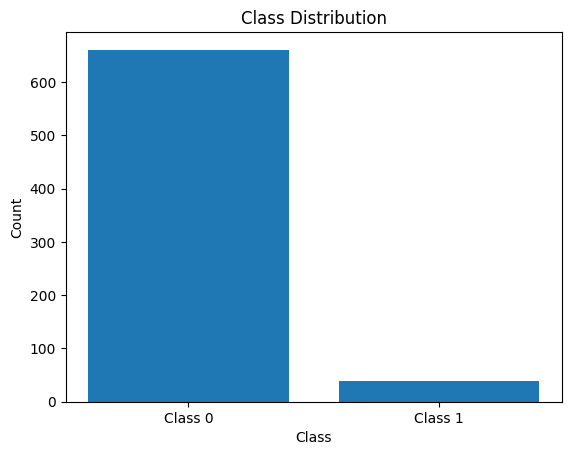

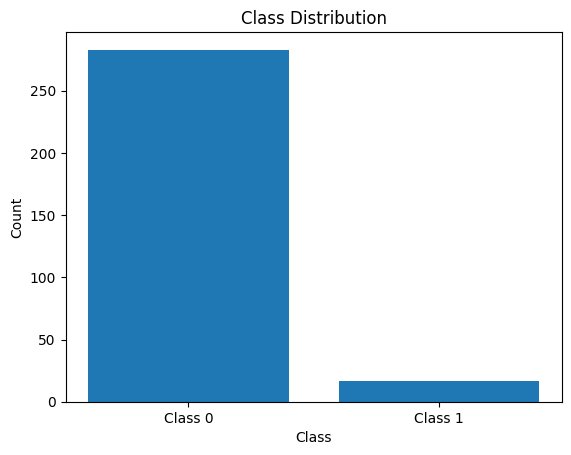

Custom Confusion Matrix:
 [[278   5]
 [ 14   3]]
Custom Accuracy: 0.9366666666666666
Custom Precision: 0.375
Custom Recall: 0.17647058823529413
Custom F1 Score: 0.24
Custom ROC AUC: 0.579401371856163
-----------
Diff conf matrix:
 [[255 235]
 [149 572]]
Diff accuracy: -0.20337745422457532
Diff precision: 0.33052147239263807
Diff recall: 0.6026622030926191
Diff f1: 0.5005022537025112
Diff roc auc: 0.1549256965115452


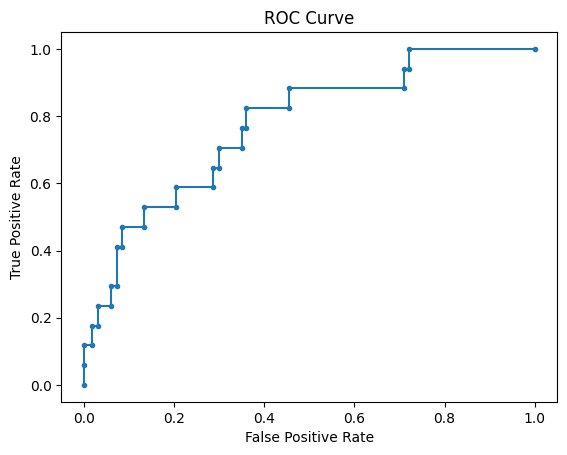

In [182]:
# splitting the data usign tehinique for imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

visualize_class_distribution(y_train)
visualize_class_distribution(y_test)


def confusion_matrix_custom(y_true, y_pred):
    tp = np.sum((y_true == 1) and (y_pred == 1))
    tn = np.sum((y_true == 0) and (y_pred == 0))
    fp = np.sum((y_true == 0) and (y_pred == 1))
    fn = np.sum((y_true == 1) and (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])


def accuracy_custom(y_true, y_pred):
    # how close are predictions to the actual values
    return np.sum(y_true == y_pred) / len(y_true)


def precision_custom(y_true, y_pred):
    # out of all positive predictions, how accurate are our predictions
    tp = np.sum((y_true == 1) and (y_pred == 1))
    fp = np.sum((y_true == 0) and (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0


def recall_custom(y_true, y_pred):
    # out of all actual positive values, how many did we predict correctly
    tp = np.sum((y_true == 1) and (y_pred == 1))
    fn = np.sum((y_true == 1) and (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0


def f1_score_custom(y_true, y_pred):
    # combination of precision and recall (harmonic mean)
    precision = precision_custom(y_true, y_pred)
    recall = recall_custom(y_true, y_pred)
    return (
        2 * (precision * recall) / (precision + recall)
        if (precision + recall) > 0
        else 0
    )


def area_under_curve(x, y):  # naive implementation
    auc = 0
    for i in range(1, len(x)):
        auc += (x[i] - x[i - 1]) * y[i]
    return auc


def roc_auc_custom(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    return area_under_curve(fpr, tpr)


# Train a logistic regression model
lr = LogisticRegression(learning_rate=0.05, epochs=20)
lr.fit_CGA(y_train, X_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate the model
confusion_matrix_custom = confusion_matrix(y_test, y_pred)
accuracy_custom = accuracy_score(y_test, y_pred)
precision_custom = precision_score(y_test, y_pred)
recall_custom = recall_score(y_test, y_pred)
f1_score_custom = f1_score(y_test, y_pred)
roc_auc_custom = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Custom Confusion Matrix:\n", confusion_matrix_custom)
print("Custom Accuracy:", accuracy_custom)
print("Custom Precision:", precision_custom)
print("Custom Recall:", recall_custom)
print("Custom F1 Score:", f1_score_custom)
print("Custom ROC AUC:", roc_auc_custom)

print("-----------")
print("Diff conf matrix:\n", conf_matrix - confusion_matrix_custom)
print("Diff accuracy:", accuracy - accuracy_custom)
print("Diff precision:", precision - precision_custom)
print("Diff recall:", recall - recall_custom)
print("Diff f1:", f1 - f1_score_custom)
print("Diff roc auc:", roc_auc - roc_auc_custom)


# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

<!-- @format -->

## Task 4: Optimization of Neural Networks


<!-- @format -->

The **backpropagation algorithm** is the foundational algorithm in deep learning. In this task You will have to go through a single iteration of said algorithm and compare the results after updating networks weights. <br>
You are given a neural network with one input layer consisting of two input nodes ${n_1, n_2}$, one hidden layer with two neurons ${n_3, n_4}$ and an output layer with a single node $n_5$. We will denote the weight connecting $n_i$ to $n_j$ as $w_{i,j}$. A bias related to $n_i$ will be denoted as $b_i$. Parameters are initialized as follows:

- $w_{1,3} = 1.5$ ; $w_{2,3} = -2.5$ ; $b_{3} = 0.3$
- $w_{1,4} = 1$ ; $w_{2,4} = -2.5$ ; $b_{4} = 0.2$
- $w_{3,5} = 4$ ; $w_{4,5} = 3$ ; $b_{5} = -0.8$ <br>

Additionally, neurons $n_3$ and $n_4$ are equipped with the sigmoid activation function: $\sigma(x) = \frac{1}{1+e^{-x}} $<br>
Your task is to use two training examples: $x = \{ (1,2), (2,0)\}$, $y = \{-1, 6\}$ to preform a single backpropagation step - preform forward calculations and propagate the received error backwards, updating the weights. After all weights have been updated, check how the predictions change, preforming additional forward pass.


<!-- @format -->

## Task 5: L1 & L2 Regularization for Logistic Regression


<!-- @format -->

In this task we will use a synthetic dataset generated by the function `make_classification`.

1. Use a pairplot to see the relationships between the features in the dataset.
2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.
3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?
4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

(If you have not done Task 1, use `LogisticRegression` from `sklearn` to see the effects of regularization. You can get half of the points for this task if you do that.)


In [183]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42,
)

dataset = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
dataset["Target"] = y

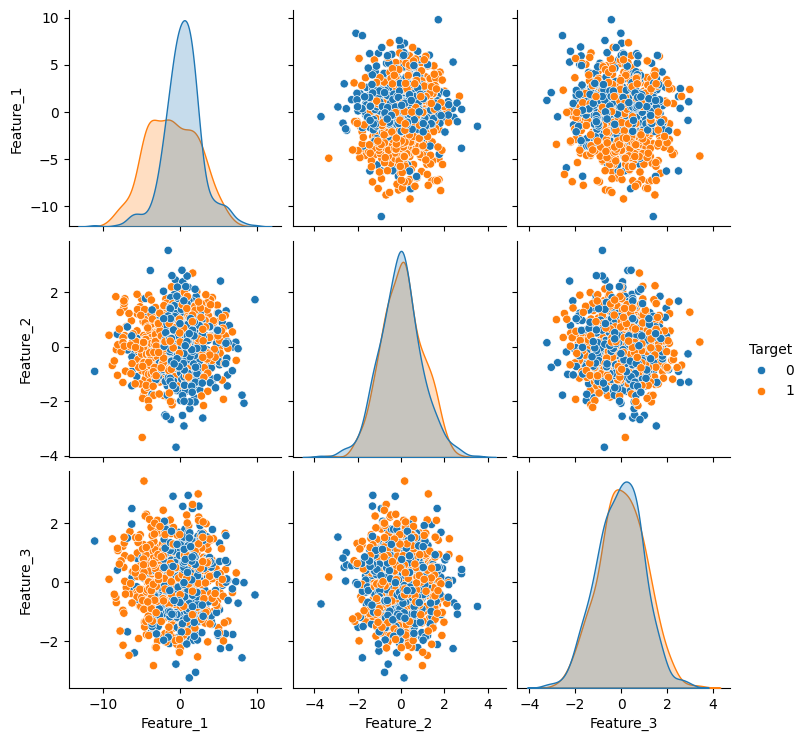

In [184]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
df["Target"] = y

subset_features = ["Feature_1", "Feature_2", "Feature_3", "Target"]

sns.pairplot(df[subset_features], hue="Target")
plt.show()

In [185]:
class LogisticRegression:
    def __init__(self, learning_rate, epochs, regularization=None, lambda_=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.beta = []
        self.regularization = regularization
        self.lambda_ = lambda_

    def sigmoid(self, z: np.array):
        return 1.0 / (1.0 + np.exp(-z))

    def log_likelihood(self, y, y_predicted):
        eps = 1e-15
        return -np.mean(
            y * np.log(y_predicted + eps) + (1 - y) * np.log(1 - y_predicted + eps)
        )

    def fit_CGA(self, y, X):
        # 0-th coordinate is the bias term
        X = np.insert(X, 0, 1, axis=1)
        self.beta = np.zeros(X.shape[1])

        loss = []

        for _ in range(self.epochs):
            y_pred = self.sigmoid(np.dot(X, self.beta))
            d_beta = np.dot(X.T, y - y_pred)
            if self.regularization == "l2":
                d_beta -= self.lambda_ * self.beta
            if self.regularization == "l1":
                d_beta -= self.lambda_ * np.sign(self.beta)
            self.beta += self.learning_rate * d_beta

            loss.append(self.log_likelihood(y, y_pred))

        return loss

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)  # Add bias
        linear_model = np.dot(X, self.beta)
        y_predicted = self.sigmoid(linear_model)  # Removed redundant beta
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def predict_proba(self, X):
        # Add bias term
        X = np.insert(X, 0, 1, axis=1)

        # Oblicz prawdopodobieństwo przy użyciu funkcji sigmoidalnej
        linear_model = np.dot(X, self.beta)
        probabilities = self.sigmoid(linear_model)

        # Zwrot: prawdopodobieństwo klasy 0 i klasy 1
        return np.column_stack((1 - probabilities, probabilities))

In [186]:
def accuracy(y_test, y_predicted):
    return np.sum(y_test == y_predicted) / len(y_test)


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model with no regularization
log_reg = LogisticRegression(0.01, 10000)
loss = log_reg.fit_CGA(y_train, X_train)
predicted = log_reg.predict(X_test)
print("Accuracy:", accuracy(y_test, predicted))

# Train a logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(0.01, 10000, regularization="l2")
loss_l2 = log_reg_l2.fit_CGA(y_train, X_train)
predicted_l2 = log_reg_l2.predict(X_test)
print("Accuracy for l2:", accuracy(y_test, predicted_l2))

# Train a logistic regression model with L1 regularization
log_reg_l1 = LogisticRegression(0.01, 10000, regularization="l1")
loss_l1 = log_reg_l1.fit_CGA(y_train, X_train)
predicted_l1 = log_reg_l1.predict(X_test)
print("Accuracy for l1:", accuracy(y_test, predicted_l1))

Accuracy: 0.735
Accuracy for l2: 0.735
Accuracy for l1: 0.735


Selected features by L1 regularization: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


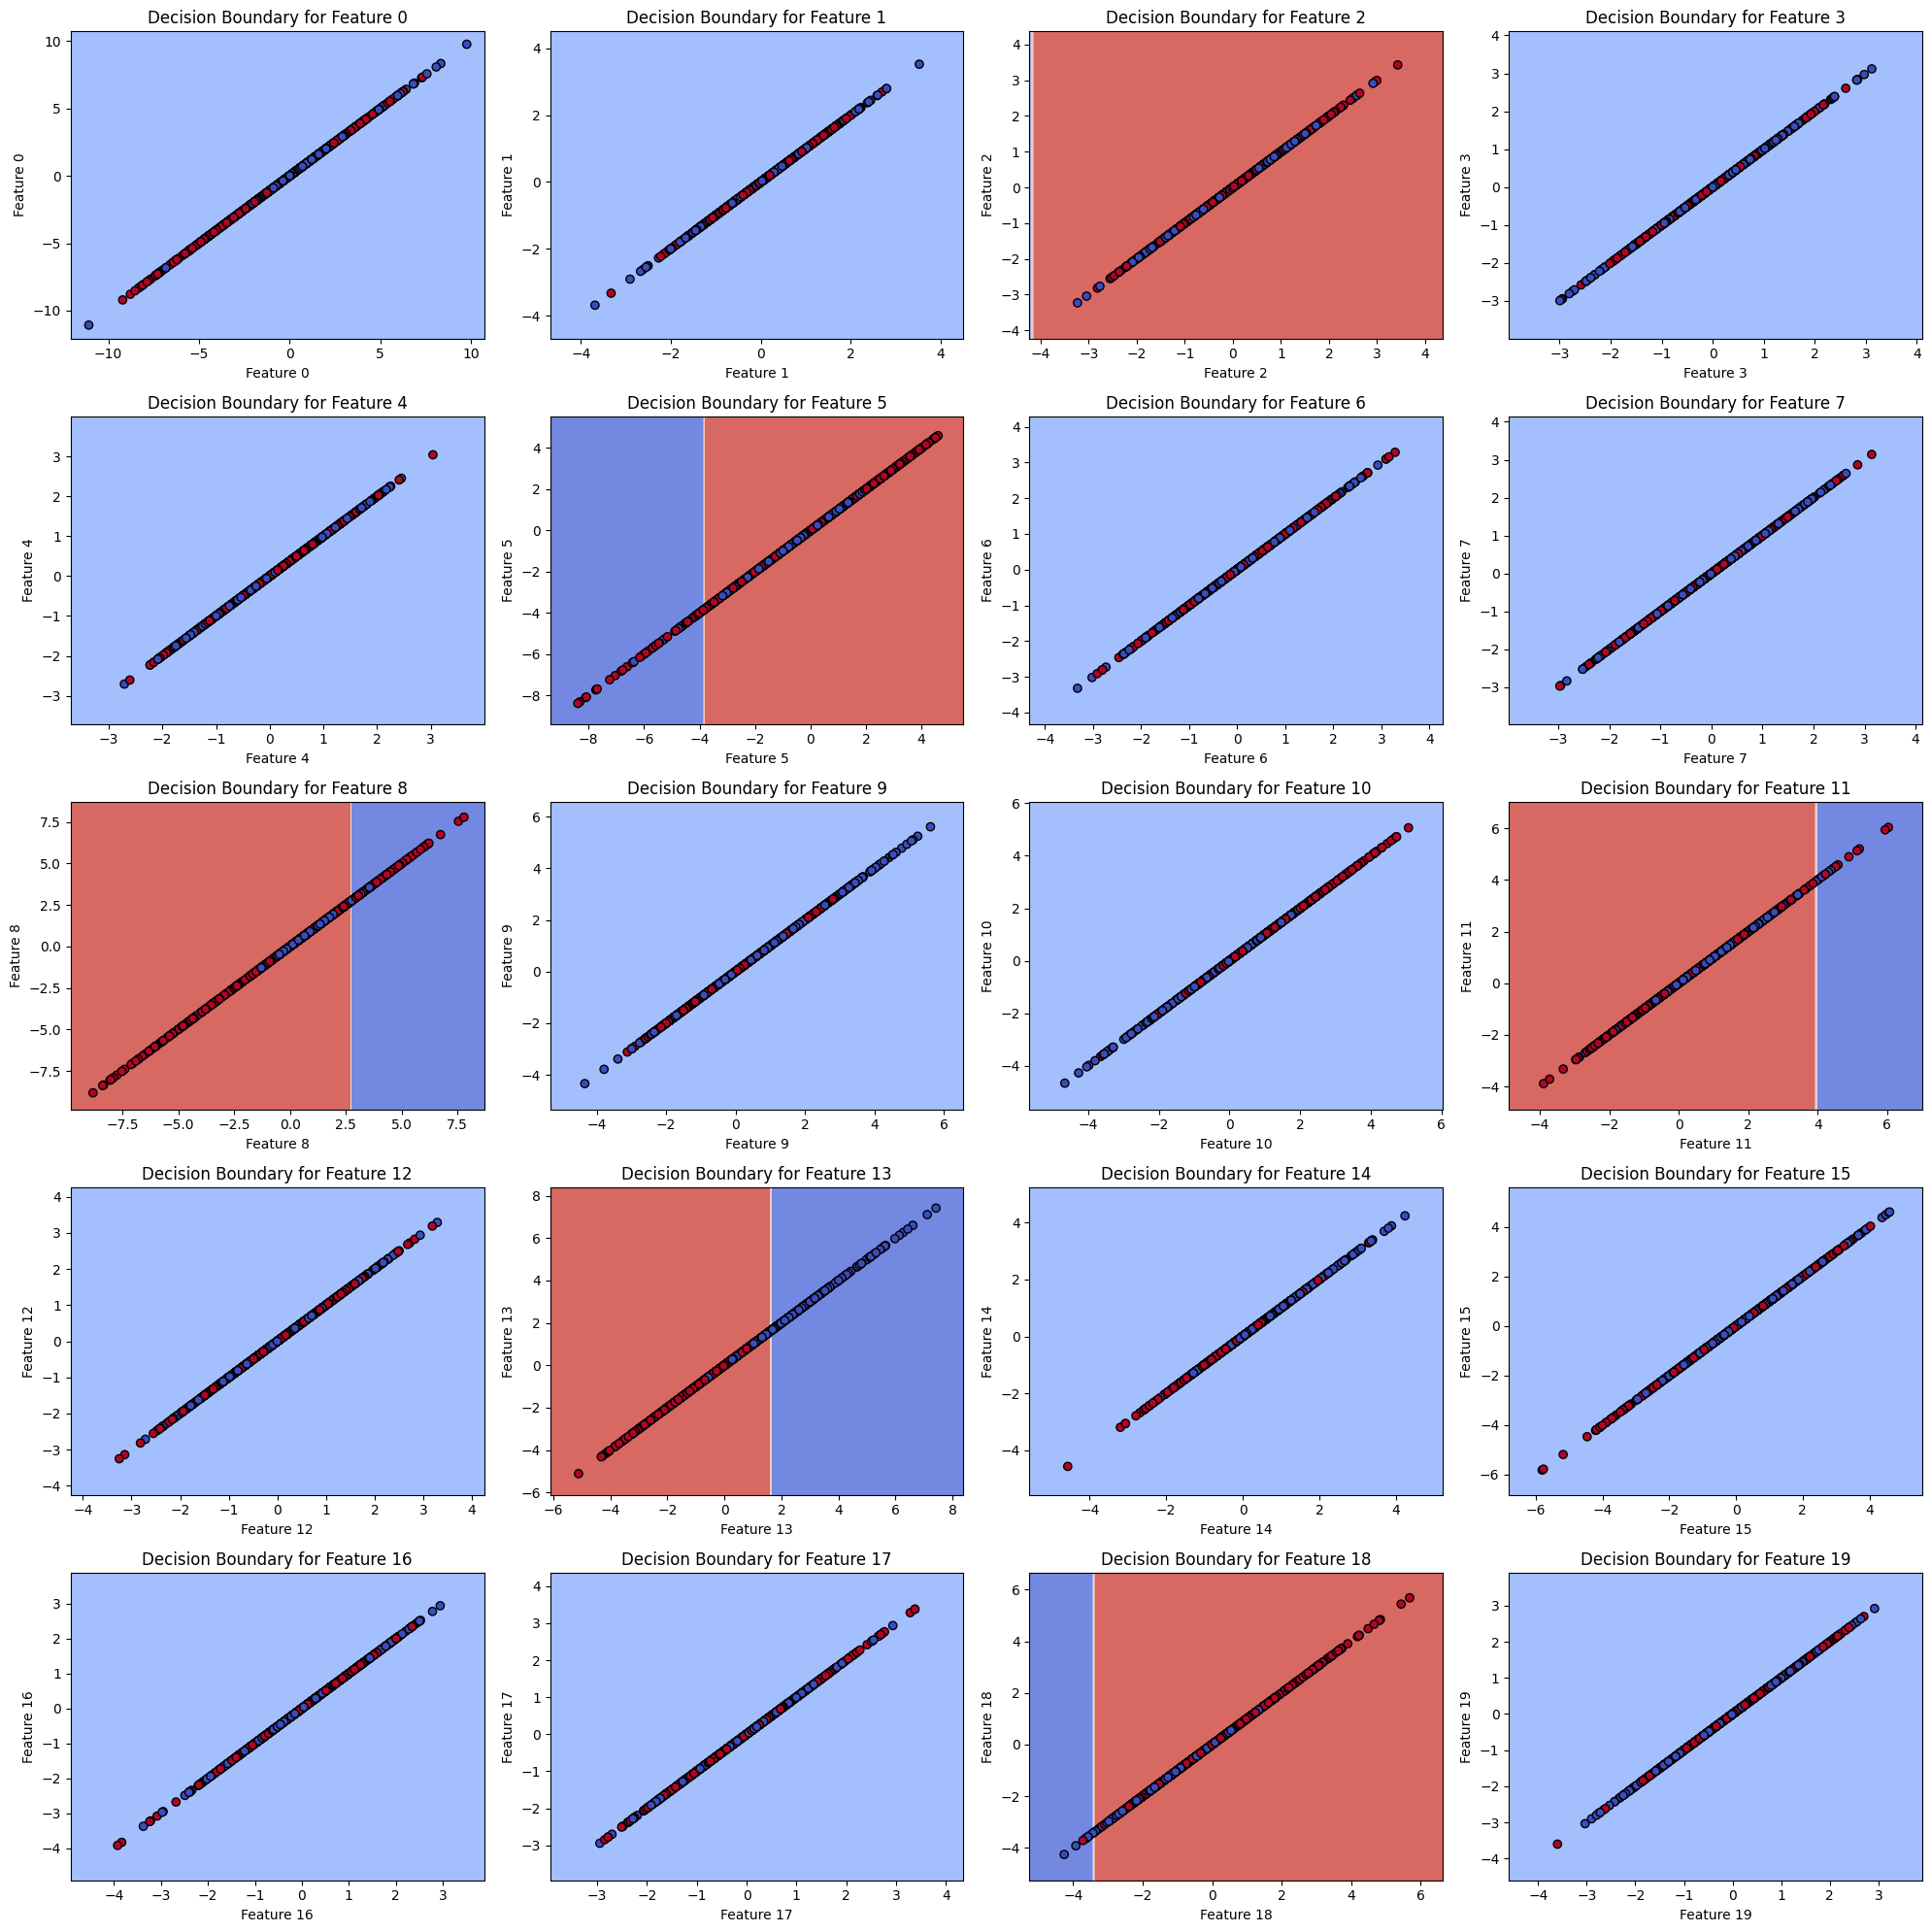

In [187]:
selected_features = np.where(log_reg_l1.beta != 0)[0]  # log_reg_l1 to Twój model
print("Selected features by L1 regularization:", selected_features)


# Plot decision boundary for all features
def plot_decision_boundary_all_features(X, y, model):
    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    axes = axes.ravel()

    for i in range(X.shape[1]):
        x_min, x_max = X[:, i].min() - 1, X[:, i].max() + 1
        y_min, y_max = X[:, i].min() - 1, X[:, i].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        # Przygotowanie siatki punktów (tylko dla jednej cechy)
        X_grid = np.c_[xx.ravel(), yy.ravel()]
        X_grid_full = np.zeros((X_grid.shape[0], X.shape[1]))
        X_grid_full[:, i] = X_grid[:, 0]  # Przypisanie wartości tylko dla cechy i

        # Oblicz predykcje
        Z = model.predict(X_grid_full)  # Używa Twojej funkcji predict
        Z = np.array(Z).reshape(xx.shape)

        # Rysowanie granicy decyzyjnej
        axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
        axes[i].scatter(
            X[:, i], X[:, i], c=y, edgecolors="k", marker="o", cmap=plt.cm.coolwarm
        )
        axes[i].set_xlabel(f"Feature {i}")
        axes[i].set_ylabel(f"Feature {i}")
        axes[i].set_title(f"Decision Boundary for Feature {i}")

    # Dopasowanie układu wykresów
    plt.tight_layout()
    plt.show()


# Call the function
plot_decision_boundary_all_features(X, y, log_reg_l1)